In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

## Importação da Base Dados para o Tunning

In [77]:
base_credit = pd.read_csv('data_base/credit_data.csv')

In [78]:
base_credit.dropna(inplace=True)

In [79]:
X=base_credit.iloc[:,1:4]

In [80]:
X

,income,age,loan
0,66155.925095,59.017015,8106.532131
1,34415.153966,48.117153,6564.745018
2,57317.170063,63.108049,8020.953296
3,42709.534201,45.751972,6103.642260
4,66952.688845,18.584336,8770.099235
...,...,...,...
1995,59221.044874,48.518179,1926.729397
1996,69516.127573,23.162104,3503.176156
1997,44311.449262,28.017167,5522.786693
1998,43756.056605,63.971796,1622.722598


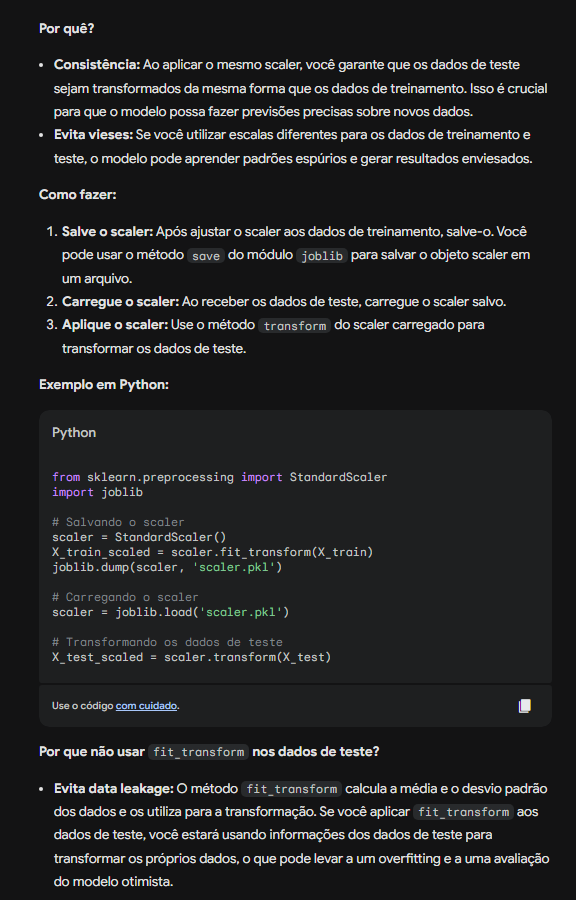

In [81]:
scaler = StandardScaler()
X[['income','age','loan']]= scaler.fit_transform(X[['income','age','loan']])

In [82]:
X

,income,age,loan
0,1.453898,1.336861,1.201907
1,-0.762398,0.536639,0.695744
2,0.836733,1.637207,1.173812
3,-0.183244,0.362998,0.544366
4,1.509532,-1.631534,1.419754
...,...,...,...
1995,0.969671,0.566081,-0.826899
1996,1.688523,-1.295454,-0.309357
1997,-0.071390,-0.939016,0.353673
1998,-0.110170,1.700619,-0.926703


In [83]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1997 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   income  1997 non-null   float64
 1   age     1997 non-null   float64
 2   loan    1997 non-null   float64
dtypes: float64(3)
memory usage: 62.4 KB


In [84]:
y=base_credit.iloc[:,4:5]
y

,c#default
0,0
1,0
2,0
3,0
4,1
...,...
1995,0
1996,0
1997,1
1998,0


In [85]:
X=X.values

In [86]:
X

array([[ 1.45389775,  1.33686061,  1.20190707],
       [-0.76239757,  0.53663921,  0.69574418],
       [ 0.8367328 ,  1.63720692,  1.17381186],
       ...,
       [-0.07139   , -0.93901609,  0.35367319],
       [-0.11017022,  1.7006195 , -0.92670314],
       [ 1.68296904,  1.12656872,  0.96300639]])

In [87]:
X.shape

(1997, 3)

In [88]:
y=y.values

In [89]:
y.shape

(1997, 1)

In [90]:
y=y.reshape(-1)

## Tunning com Árvore de Decisão

In [57]:
parametros = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]}

In [58]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parametros)
grid_search.fit(X, y)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
0.9844724310776943


## Tunning com Random Forest


In [59]:
parametros = {'criterion': ['gini', 'entropy'],
              'n_estimators': [10, 40, 100, 150],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]}

In [60]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros)
grid_search.fit(X, y)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 40}
0.9874761904761904


## Tunning Knn

In [63]:
parametros = {'n_neighbors': [3, 5, 10, 20],
              'p': [1, 2]}

In [65]:
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros)
grid_search.fit(X, y)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'n_neighbors': 20, 'p': 1}
0.8537832080200503


## Tunning Regressão Logística

In [94]:
parametros = {'tol': [0.0001, 0.00001, 0.000001],
              'C': [1.0, 1.5, 2.0],
              'solver': ['lbfgs', 'sag', 'saga'],
              'max_iter':[100,500,1000]
             }

In [95]:
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parametros)
grid_search.fit(X, y)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'C': 1.0, 'max_iter': 100, 'solver': 'saga', 'tol': 0.0001}
0.947422305764411
